## Import necessary libraries


---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, max_error
from yellowbrick.regressor import ResidualsPlot, residuals_plot, prediction_error

## Data preprocessing
---

In [2]:
# Read the CSV file into a DataFrame
data = pd.read_csv(r"C:\Users\rm8l\Documents\data\Therapy riser dose rates.csv")

# Encode the 'WKDY' column using LabelEncoder
encoder = LabelEncoder()
data['WKDY'] = encoder.fit_transform(data['WKDY'])

# Split the data into features (X) and labels (y)
X = data.drop(["1F dose rate"], axis=1)
y = data["1F dose rate"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Scale the features using RobustScaler
X_sc = RobustScaler()
X_train = pd.DataFrame(X_sc.fit_transform(X_train))
X_test = pd.DataFrame(X_sc.transform(X_test))

# Initialize dictionaries for model and fit comparison
model_comp = {}
fit_comp = {}

In [3]:
# Define a function to calculate evaluation metrics: RMSE, MAE, MAPE, Max error
def metrics(y_test, y_pred):
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    ME = max_error(y_test, y_pred)
    RMSE = ("RMSE = " + str(RMSE))
    MAE = ("MAE = " + str(MAE))
    MAPE = ("MAPE = " + str(MAPE))
    ME = ("Max error = " + str(ME))
    return RMSE, MAE, MAPE, ME

In [4]:
# Define a function to create a figure for plotting the predicted and measured values
def plot_pred(model, y_test, y_pred):
    figure(figsize=(18, 6), dpi=80)
    plt.title(label="Predicted vs measured for {model} model".format(model = model))
    plt.xlabel("Day")
    plt.ylabel("Daily average dose rate (micro Sv/hr)")
    plt.plot(range(0, y_pred.size), y_pred, color='b', label="Predicted")
    plt.plot(range(0, y_test.size), y_test, color='r', label="Measured")
    plt.legend(loc="upper right")
    return plt.show()

In [5]:
# Define a function to create a residual plot with histogram
def res_hist_plot(model, X_train, y_train, X_test, y_test):
    res_plt = ResidualsPlot(model, train_alpha=0.5, test_alpha=0.8,
                            train_color="g", test_color="b", is_fitted=True)
    res_plt.fit(X_train, y_train)
    res_plt.score(X_test, y_test)
    hist_plot = res_plt.show()
    train_r2score = res_plt.train_score_
    test_r2score = res_plt.test_score_
    r2score_diff = train_r2score - test_r2score
    return hist_plot, train_r2score, test_r2score, r2score_diff

In [6]:
# Define a function to create a residual plot with qq plot
def res_qq_plot(model, X_train, y_train, X_test, y_test):
    res_plt = ResidualsPlot(model, train_alpha=0.5, test_alpha=0.8,
                              train_color="g", test_color="b", is_fitted=True,
                              hist=False, qqplot=True)
    res_plt.fit(X_train, y_train)
    res_plt.score(X_test, y_test)
    qq_plt = res_plt.show()
    return qq_plt

## Train Linear Regressor
---


RMSE = RMSE = 1.1876591410853037
MAE = MAE = 0.9735168286319159
MAPE = MAPE = 0.39017955565263895
Max error = Max error = 3.9106810884321286



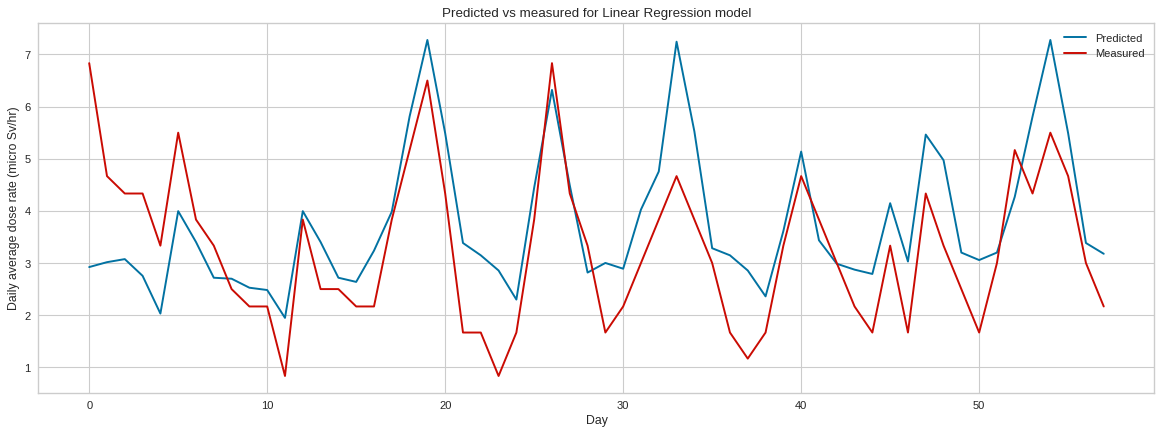

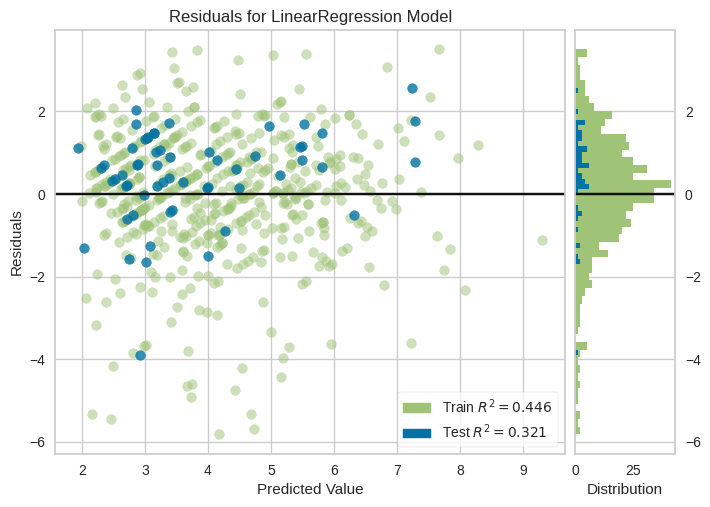

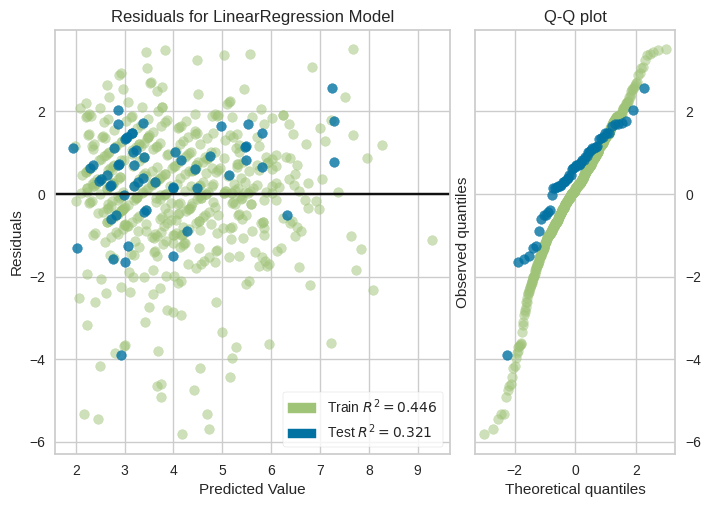

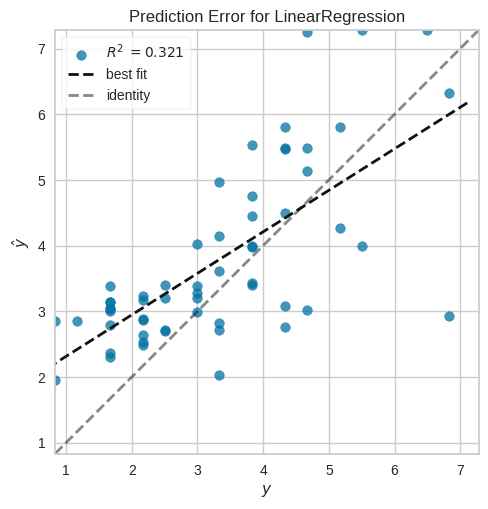

In [7]:
# Import the LinearRegression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression and assign it to the variable LR
LR = LinearRegression()

# Fit the model on the training data
LR.fit(X_train, y_train)

# Make predictions on the test data
y_pred_LR = LR.predict(X_test)

# Calculate evaluation metrics: RMSE, MAE, MAPE, Max error
LR_RMSE, LR_MAE, LR_MAPE, LR_ME = metrics(y_test, y_pred_LR)

# Print the evaluation metrics
print("")
print("RMSE = " + str(LR_RMSE))
print("MAE = " + str(LR_MAE))
print("MAPE = " + str(LR_MAPE))
print("Max error = " + str(LR_ME))
print("")

# Create a figure for plotting the predicted and measured values
plot_pred("Linear Regression", y_test, y_pred_LR)
print("")

# Create a residual plot with histogram
LR_res_hist_plot, LR_train_r2score, LR_test_r2score, LR_r2score_diff = res_hist_plot(LR,
                                                                    X_train,
                                                                    y_train,
                                                                    X_test,
                                                                    y_test)
print("")

# Create a residual plot with qq plot
LR_res_qq_plot = res_qq_plot(LR, X_train, y_train, X_test, y_test)
print("")

# Create a prediction error plot
LR_error_plt = prediction_error(LR, X_train, y_train, X_test, y_test, is_fitted=True)

# Store the train R2 score, test R2 score, and the difference between them
# in the fit_comp dictionary
fit_comp['LR'] = [LR_train_r2score, LR_test_r2score, LR_r2score_diff]

# Store the RMSE, MAE, MAPE, and max error in the model_comp dictionary
model_comp['LR'] = [LR_RMSE, LR_MAE, LR_MAPE, LR_ME]


## Train K Neaerest Neighbour regressor
---

RMSE = RMSE = 1.3117907679665755
MAE = MAE = 1.0247126436103449
MAPE = MAPE = 0.45430964310793476
Max error = Max error = 4.0833333332



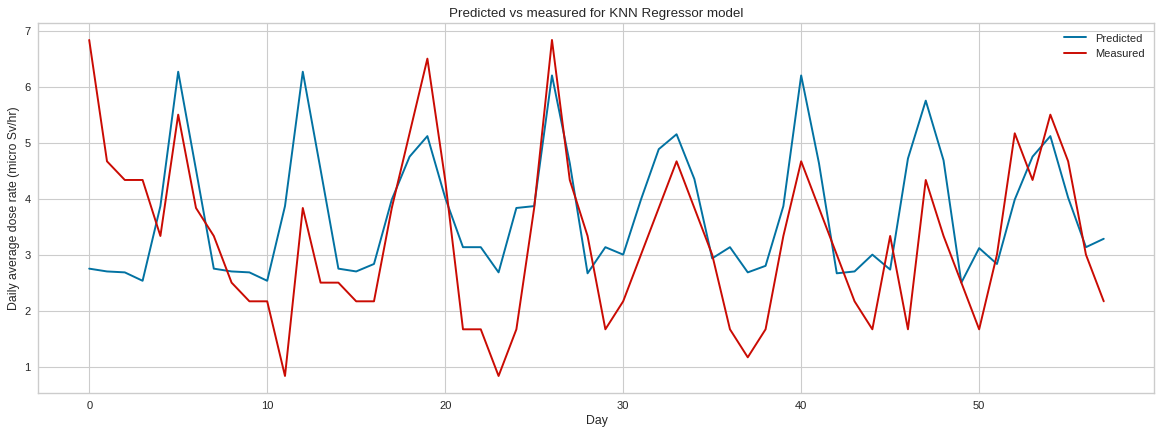

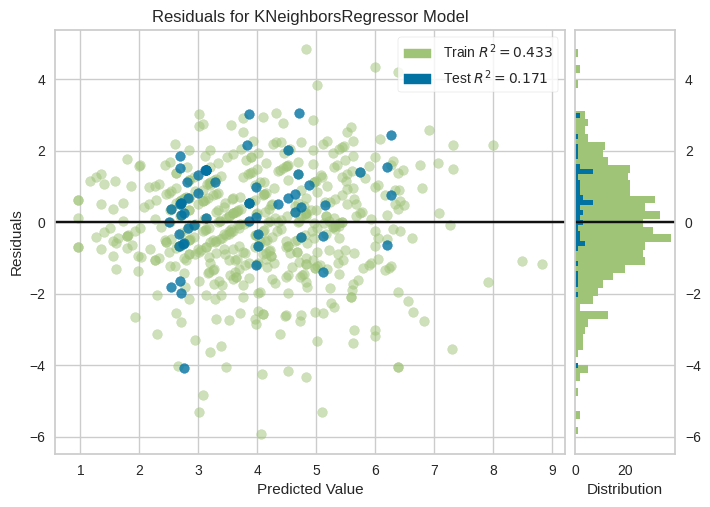

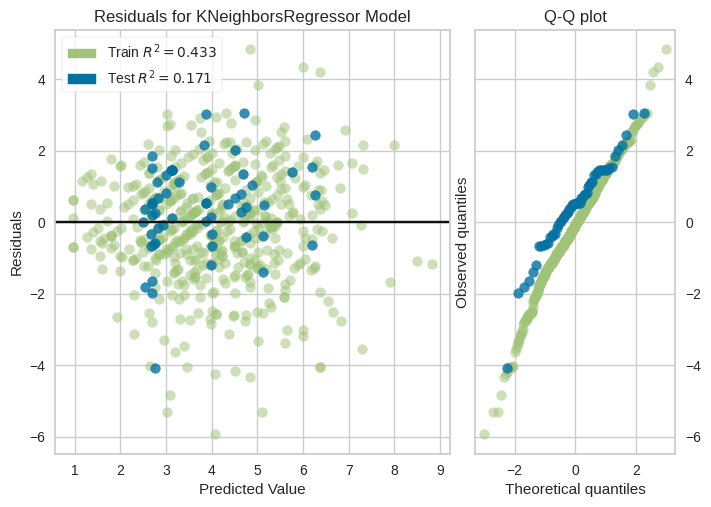

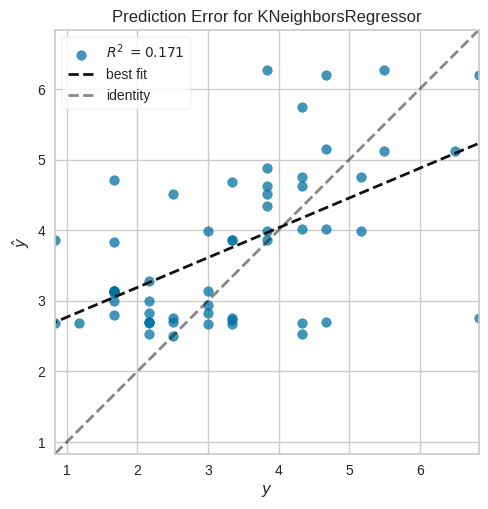

In [8]:
# Import the KNeighborsRegressor class from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsRegressor

# Create an instance of KNeighborsRegressor and assign it to the variable KNN
KNN = KNeighborsRegressor()

# Fit the model on the training data
KNN.fit(X_train, y_train)

# Make predictions on the test data
y_pred_KNN = KNN.predict(X_test)

# Calculate evaluation metrics: RMSE, MAE, MAPE, Max error
KNN_RMSE, KNN_MAE, KNN_MAPE, KNN_ME = metrics(y_test, y_pred_KNN)

# Print the evaluation metrics
print("RMSE = " + str(KNN_RMSE))
print("MAE = " + str(KNN_MAE))
print("MAPE = " + str(KNN_MAPE))
print("Max error = " + str(KNN_ME))
print("")

# Create a figure for plotting the predicted and measured values
plot_pred("KNN Regressor", y_test, y_pred_KNN)
print("")

# Create a residual plot with histogram
KNN_res_hist_plot, KNN_train_r2score, KNN_test_r2score, KNN_r2score_diff = res_hist_plot(KNN,
                                                                    X_train,
                                                                    y_train,
                                                                    X_test,
                                                                    y_test)
print("")

# Create a residual plot with qq plot
KNN_res_qq_plot = res_qq_plot(KNN, X_train, y_train, X_test, y_test)
print("")

# Create a prediction error plot
KNN_error_plt = prediction_error(KNN, X_train, y_train, X_test, y_test, is_fitted =True)

# Store the train R2 score, test R2 score, and the difference between them
# in the fit_comp dictionary
fit_comp['KNN']=[KNN_train_r2score, KNN_test_r2score, KNN_r2score_diff]

# Store the RMSE, MAE, MAPE, and max error in the model_comp dictionary
model_comp['KNN']=[KNN_RMSE, KNN_MAE, KNN_MAPE, KNN_ME]

## Train Decision Tree Regressor
---

RMSE = RMSE = 1.8975209849498111
MAE = MAE = 1.5244699763646268
MAPE = MAPE = 0.5892396900542846
Max error = Max error = 4.333333333



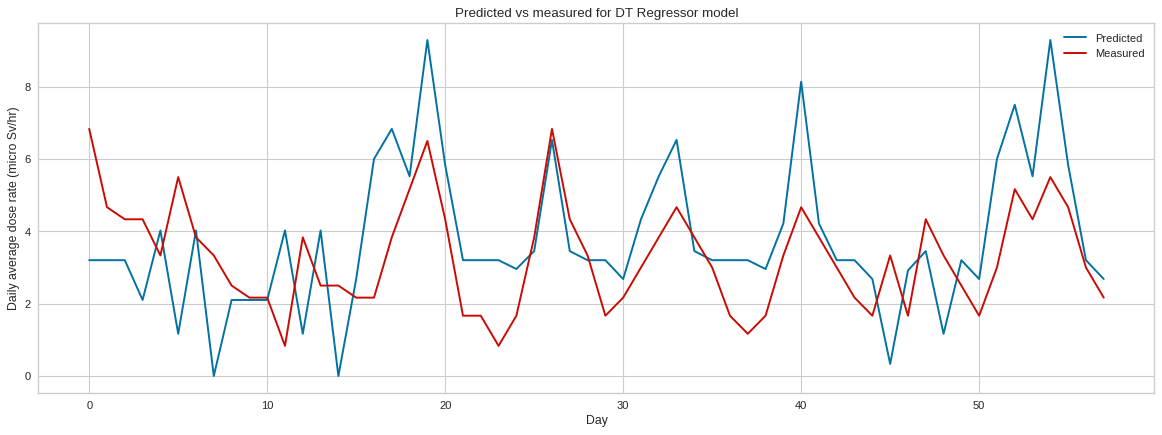

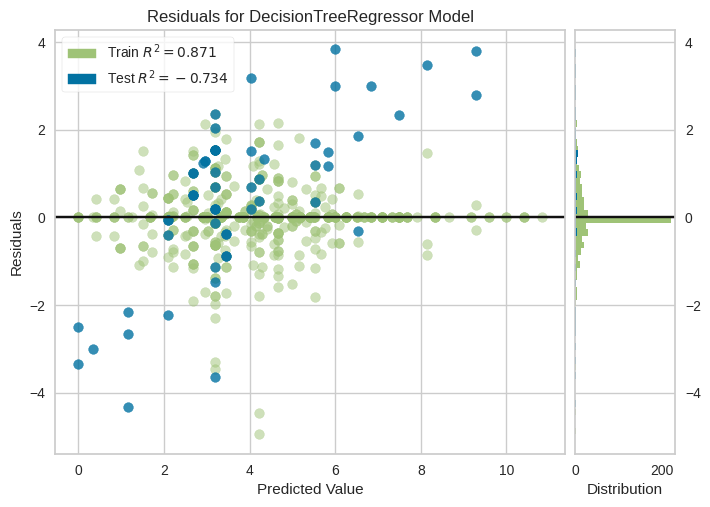

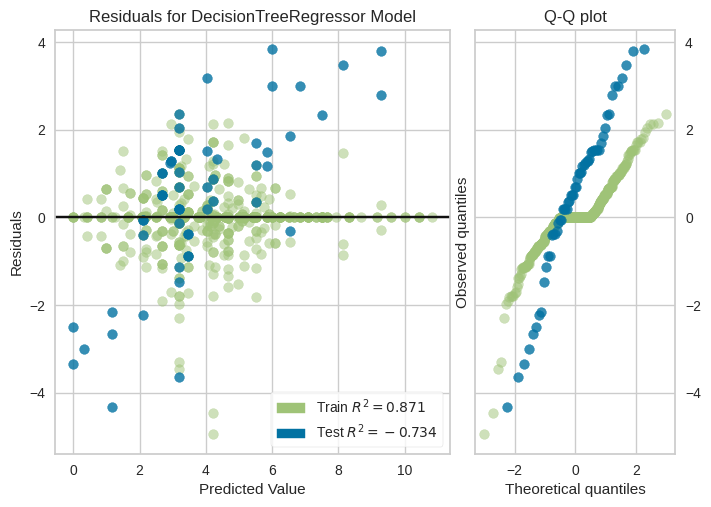

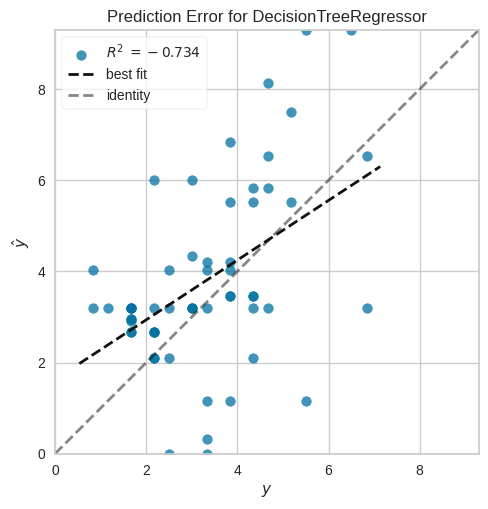

In [9]:
# Import the required library
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor object with specified parameters
DT = DecisionTreeRegressor(max_depth=10, random_state=0)

# Fit the model on the training data
DT.fit(X_train, y_train)

# Make predictions on the test data
y_pred_DT = DT.predict(X_test)

# Calculate evaluation metrics: RMSE, MAE, MAPE, Max error
DT_RMSE, DT_MAE, DT_MAPE, DT_ME = metrics(y_test, y_pred_DT)

# Print the evaluation metrics
print("RMSE =", DT_RMSE)
print("MAE =", DT_MAE)
print("MAPE =", DT_MAPE)
print("Max error =", DT_ME)
print("")

# Create a figure for plotting the predicted and measured values
plot_pred("DT Regressor", y_test, y_pred_DT)
print("")

# Create a residual plot with histogram
DT_res_hist_plot, DT_train_r2score, DT_test_r2score, DT_r2score_diff = res_hist_plot(DT,
                                                                    X_train,
                                                                    y_train,
                                                                    X_test,
                                                                    y_test)
print("")

# Create a residual plot with qq plot
DT_res_qq_plot = res_qq_plot(DT, X_train, y_train, X_test, y_test)
print("")

# Create a prediction error plot for Decision Tree
DT_error_plt = prediction_error(DT, X_train, y_train, X_test, y_test, is_fitted=True)

# Update the fit_comp dictionary with R-squared scores
fit_comp['DT'] = [DT_train_r2score, DT_test_r2score, DT_r2score_diff]

# Update the model_comp dictionary with evaluation metrics
model_comp['DT'] = [DT_RMSE, DT_MAE, DT_MAPE, DT_ME]


## Train Random Forest Regressor
---

RMSE = RMSE = 1.3116416236916526
MAE = MAE = 1.0748473918825334
MAPE = MAPE = 0.44704552370717326
Max error = Max error = 3.8243686320618



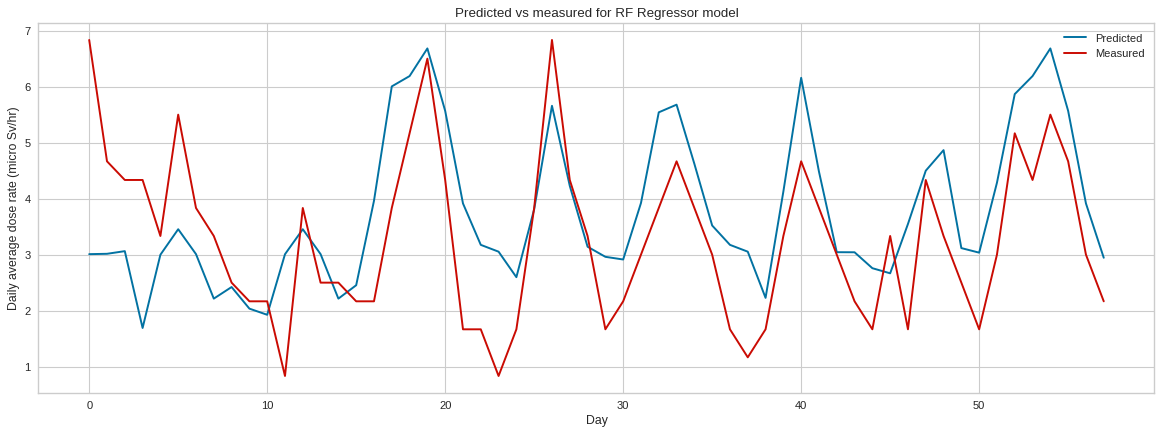

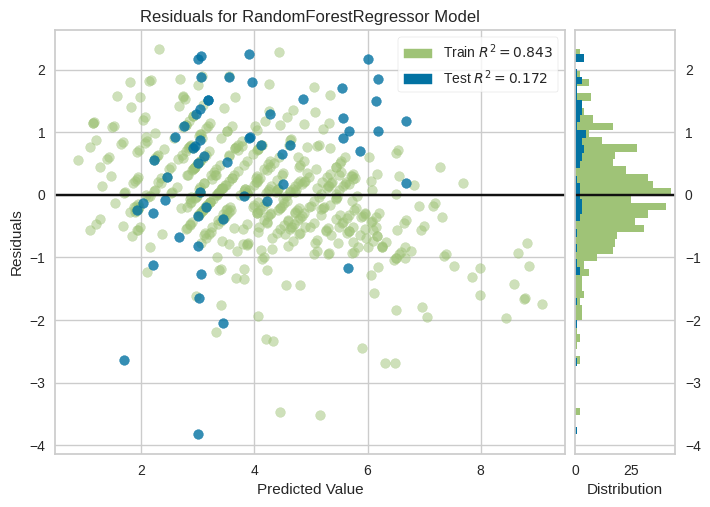

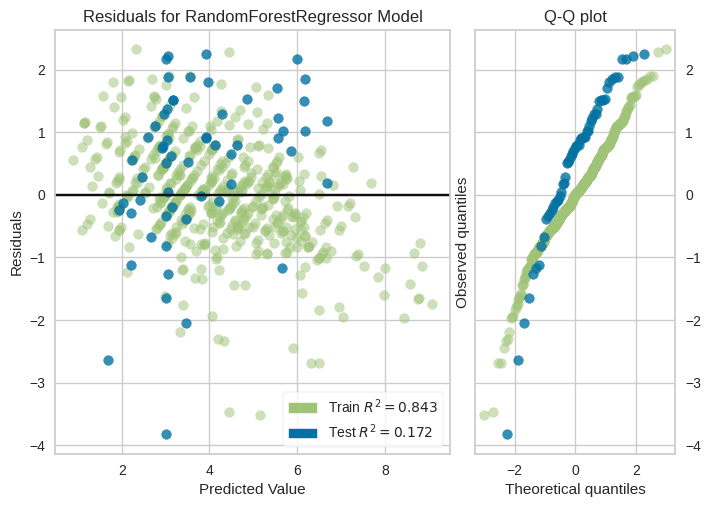

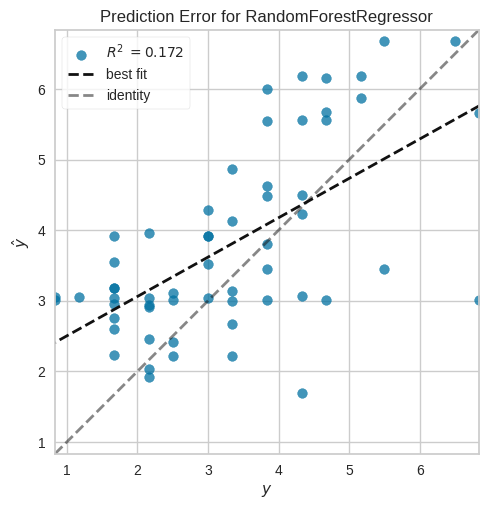

In [10]:
# Import the required library
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object with specified parameters
RF = RandomForestRegressor(max_depth=10, random_state=0)

# Fit the model on the training data
RF.fit(X_train, y_train)

# Make predictions on the test data
y_pred_RF = RF.predict(X_test)

# Calculate evaluation metrics: RMSE, MAE, MAPE, Max error
RF_RMSE, RF_MAE, RF_MAPE, RF_ME = metrics(y_test, y_pred_RF)

# Print the evaluation metrics
print("RMSE =", RF_RMSE)
print("MAE =", RF_MAE)
print("MAPE =", RF_MAPE)
print("Max error =", RF_ME)
print("")

# Create a figure for plotting the predicted and measured values
plot_pred("RF Regressor", y_test, y_pred_RF)
print("")

# Create a residual plot with histogram
RF_res_hist_plot, RF_train_r2score, RF_test_r2score, RF_r2score_diff = res_hist_plot(RF,
                                                                    X_train,
                                                                    y_train,
                                                                    X_test,
                                                                    y_test)
print("")

# Create a residual plot with qq plot
RF_res_qq_plot = res_qq_plot(RF, X_train, y_train, X_test, y_test)
print("")

# Create a prediction error plot for Random Forest
RF_error_plt = prediction_error(RF, X_train, y_train, X_test, y_test, is_fitted=True)

# Update the fit_comp dictionary with R-squared scores
fit_comp['RF'] = [RF_train_r2score, RF_test_r2score, RF_r2score_diff]

# Update the model_comp dictionary with evaluation metrics
model_comp['RF'] = [RF_RMSE, RF_MAE, RF_MAPE, RF_ME]


## Train Gradient Boosting Regressor
---

RMSE = RMSE = 1.1058333050844324
MAE = MAE = 0.8735164862763847
MAPE = MAPE = 0.35527092389062936
Max error = Max error = 3.2659676644580236



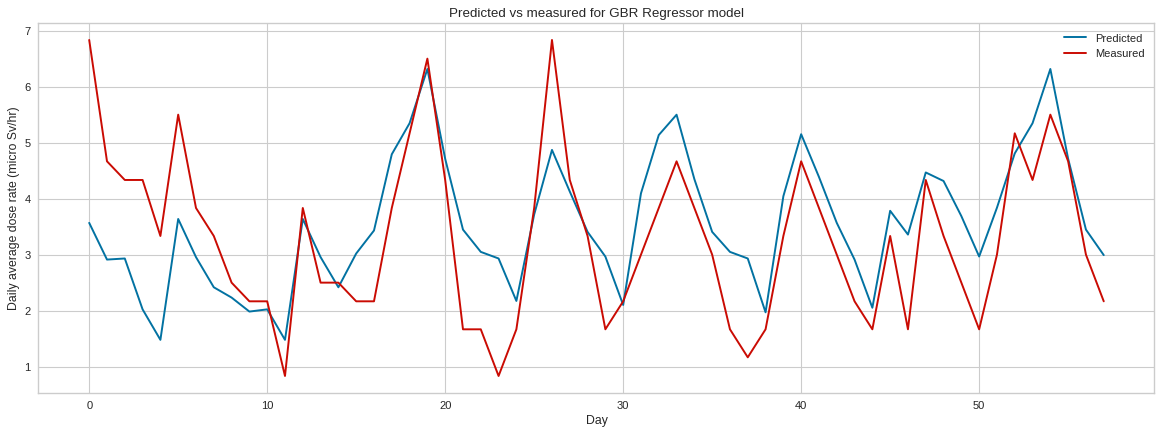

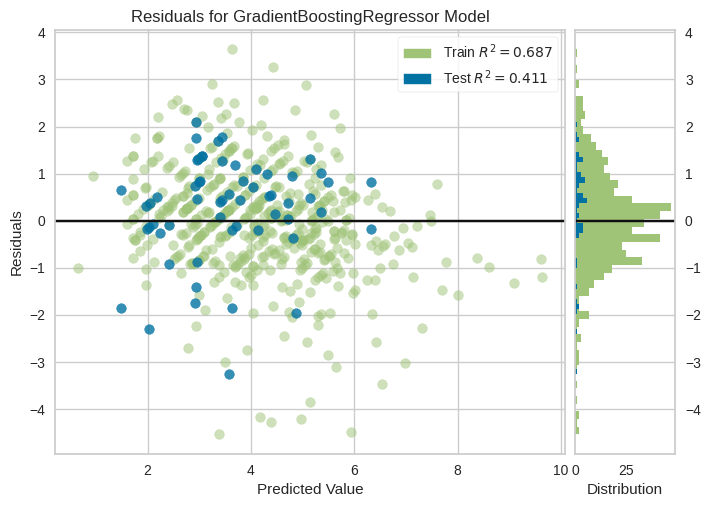

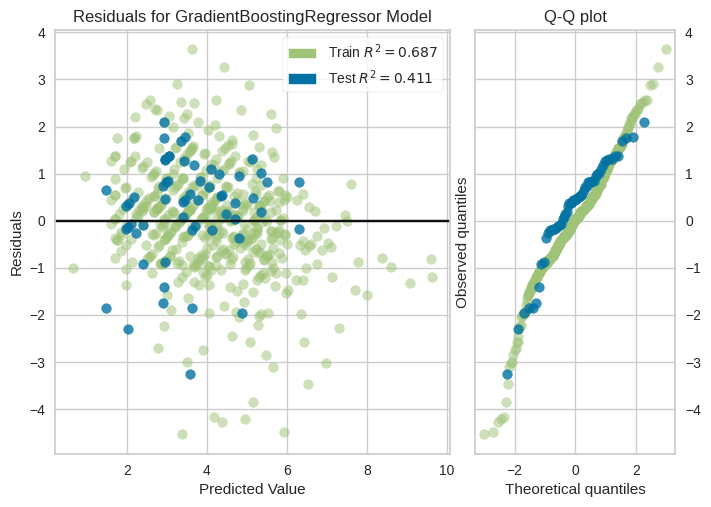

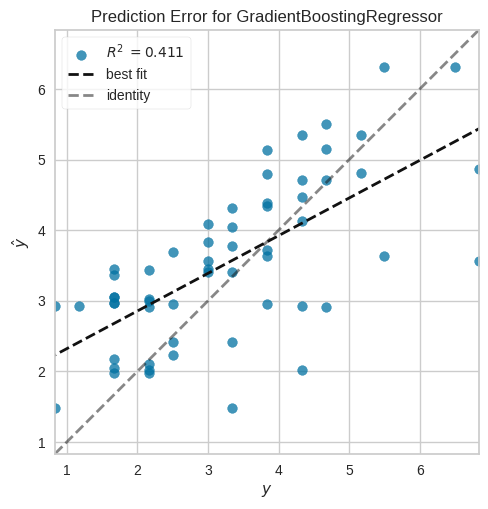

In [11]:
# Import the required library
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor object with specified parameters
GBR = GradientBoostingRegressor(n_iter_no_change=10, random_state=0)

# Fit the model on the training data
GBR.fit(X_train, y_train)

# Make predictions on the test data
y_pred_GBR = GBR.predict(X_test)

# Calculate evaluation metrics: RMSE, MAE, MAPE, Max error
GBR_RMSE, GBR_MAE, GBR_MAPE, GBR_ME = metrics(y_test, y_pred_GBR)

# Print the evaluation metrics
print("RMSE =", GBR_RMSE)
print("MAE =", GBR_MAE)
print("MAPE =", GBR_MAPE)
print("Max error =", GBR_ME)
print("")

# Create a figure for plotting the predicted and measured values
plot_pred("GBR Regressor", y_test, y_pred_GBR)
print("")

# Create a residual plot with histogram
GBR_res_hist_plot, GBR_train_r2score, GBR_test_r2score, GBR_r2score_diff = res_hist_plot(GBR,
                                                                    X_train,
                                                                    y_train,
                                                                    X_test,
                                                                    y_test)
print("")

# Create a residual plot with qq plot
GBR_res_qq_plot = res_qq_plot(GBR, X_train, y_train, X_test, y_test)
print("")

# Create a prediction error plot for Gradient Boosting Regressor
GBR_error_plt = prediction_error(GBR, X_train, y_train, X_test, y_test, is_fitted=True)

# Update the fit_comp dictionary with R-squared scores
fit_comp['GBR']=[GBR_train_r2score, GBR_test_r2score, GBR_r2score_diff]

# Update the model_comp dictionary with evaluation metrics
model_comp['GBR']=[GBR_RMSE, GBR_MAE, GBR_MAPE, GBR_ME]

## Train Support Vector Machine Regressor
---

RMSE = RMSE = 1.2598824482946511
MAE = MAE = 1.0075318751313282
MAPE = MAPE = 0.48175290957168027
Max error = Max error = 3.4497740171979885



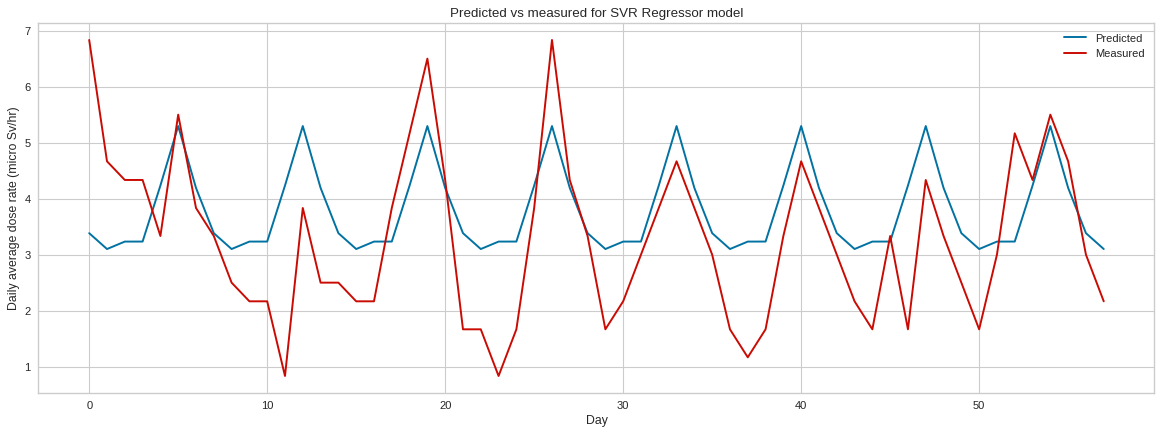

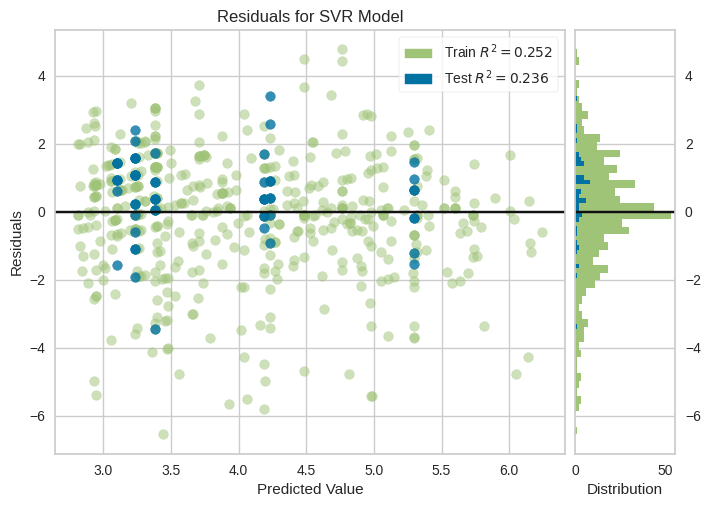

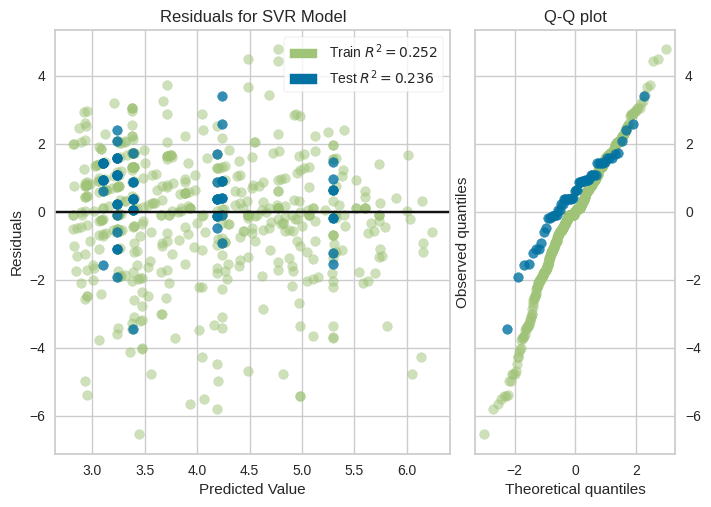

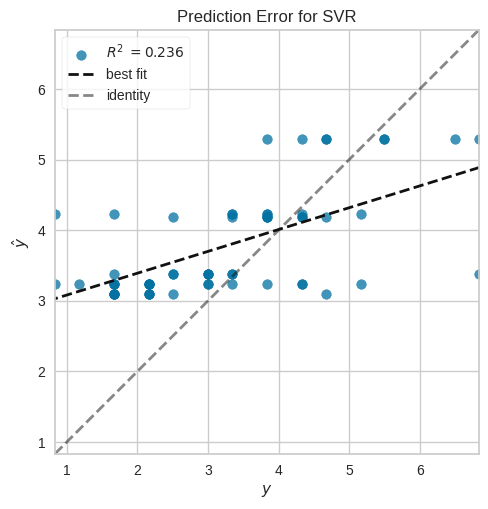

In [13]:
# Import the required library
from sklearn.svm import SVR

# Create an SVR model object
SVR_model = SVR()

# Fit the SVR model on the training data
SVR_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_SVR = SVR_model.predict(X_test)

# Calculate evaluation metrics: RMSE, MAE, MAPE, Max error
SVR_RMSE, SVR_MAE, SVR_MAPE, SVR_ME = metrics(y_test, y_pred_SVR)

# Print the evaluation metrics
print("RMSE =", SVR_RMSE)
print("MAE =", SVR_MAE)
print("MAPE =", SVR_MAPE)
print("Max error =", SVR_ME)
print("")

# Create a figure for plotting the predicted and measured values
plot_pred("SVR Regressor", y_test, y_pred_SVR)
print("")

# Create a residual plot with histogram
SVR_res_hist_plot, SVR_train_r2score, SVR_test_r2score, SVR_r2score_diff = res_hist_plot(SVR_model,
                                                                    X_train,
                                                                    y_train,
                                                                    X_test,
                                                                    y_test)
print("")

# Create a residual plot with qq plot
SVR_res_qq_plot = res_qq_plot(SVR_model, X_train, y_train, X_test, y_test)
print("")

# Create a prediction error plot for SVR
SVR_error_plt = prediction_error(SVR_model, X_train, y_train, X_test, y_test, is_fitted=True)

# Update the fit_comp dictionary with R-squared scores
fit_comp['SVR'] = [SVR_train_r2score, SVR_test_r2score, SVR_r2score_diff]

# Update the model_comp dictionary with evaluation metrics
model_comp['SVR']=[SVR_RMSE, SVR_MAE, SVR_MAPE, SVR_ME]


## Create Table of Errors
---

In [14]:
# Convert the model_comp dictionary to a DataFrame
model_comp = pd.DataFrame.from_dict(model_comp).T

# Set the column names of the DataFrame
model_comp.columns = ['RMSE', 'MAE', 'MAPE', 'Max error']

# Sort the DataFrame based on the 'MAPE' column in ascending order
model_comp = model_comp.sort_values('MAPE', ascending=True)

# Round the values in the DataFrame to 3 decimal places
# Apply a background gradient to the rounded DataFrame using the 'Blues' colormap
(model_comp.round(3)).style.background_gradient(cmap='Blues')

,RMSE,MAE,MAPE,Max error
GBR,RMSE = 1.1058333050844324,MAE = 0.8735164862763847,MAPE = 0.35527092389062936,Max error = 3.2659676644580236
LR,RMSE = 1.1876591410853037,MAE = 0.9735168286319159,MAPE = 0.39017955565263895,Max error = 3.9106810884321286
RF,RMSE = 1.3116416236916526,MAE = 1.0748473918825334,MAPE = 0.44704552370717326,Max error = 3.8243686320618
KNN,RMSE = 1.3117907679665755,MAE = 1.0247126436103449,MAPE = 0.45430964310793476,Max error = 4.0833333332
SVR,RMSE = 1.2598824482946511,MAE = 1.0075318751313282,MAPE = 0.48175290957168027,Max error = 3.4497740171979885
DT,RMSE = 1.8975209849498111,MAE = 1.5244699763646268,MAPE = 0.5892396900542846,Max error = 4.333333333


## Create Table of r<sup>2</sup> values
---

In [15]:
# Convert the fit_comp dictionary to a DataFrame
fit_comp = pd.DataFrame.from_dict(fit_comp).T

# Set the column names of the DataFrame
fit_comp.columns = ['train r2', 'test r2', 'r2 diff']

# Sort the DataFrame based on the 'test r2' column in descending order
fit_comp = fit_comp.sort_values('test r2', ascending=False)

# Apply a background gradient to the DataFrame using the 'Blues' colormap
# Display the styled DataFrame
fit_comp.style.background_gradient(cmap='Blues')

,train r2,test r2,r2 diff
GBR,0.687166,0.411213,0.275954
LR,0.446313,0.320855,0.125459
SVR,0.252031,0.235744,0.016288
RF,0.843133,0.171658,0.671475
KNN,0.433419,0.171470,0.261949
DT,0.870614,-0.733613,1.604228


## Produce Regression plots of predictions
---

<ipython-input-16-a7e37a4cf918>:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 7], [0, 7], 'k--', color='r')


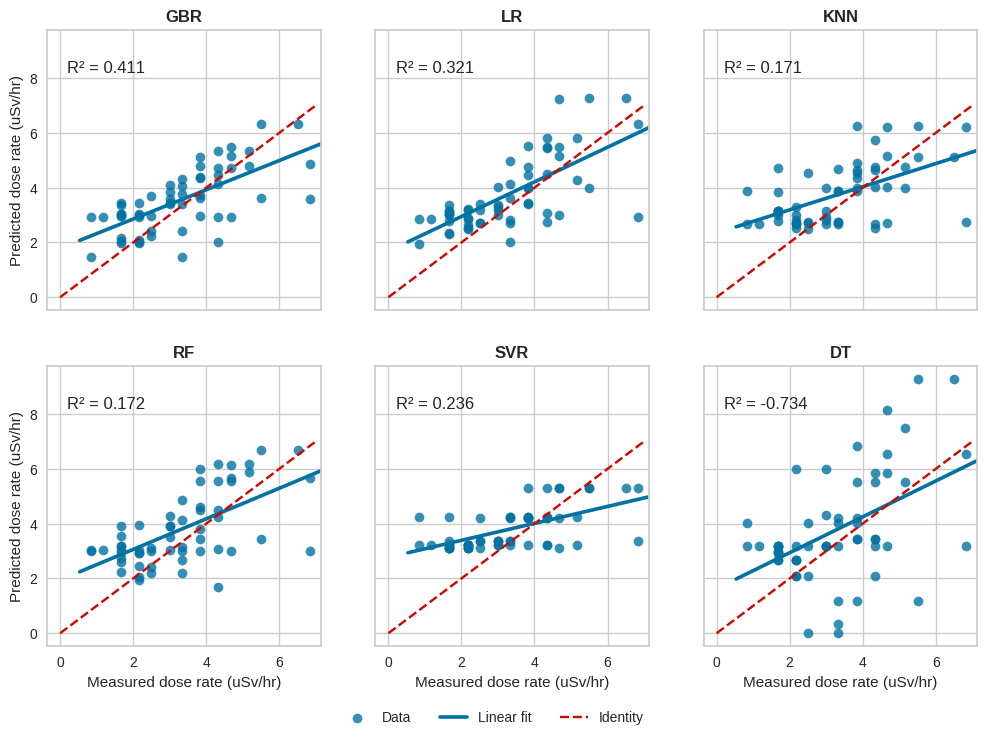

In [16]:
# Create a figure with subplots arranged in a 2x3 grid and set the size
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

# Plot a scatter plot with a linear regression line for GBR
sns.regplot(x=y_test, y=y_pred_GBR, ax=axs[0, 0], ci=None, truncate=False)
axs[0, 0].set_title('GBR', fontweight="bold")
axs[0, 0].text(0.2, 8.2, f'R² = {GBR_test_r2score:,.3f}')

# Plot a scatter plot with a linear regression line for LR
sns.regplot(x=y_test, y=y_pred_LR, ax=axs[0, 1], ci=None, truncate=False)
axs[0, 1].set_title('LR', fontweight="bold")
axs[0, 1].text(0.2, 8.2, f'R² = {LR_test_r2score:,.3f}')

# Plot a scatter plot with a linear regression line for KNN
sns.regplot(x=y_test, y=y_pred_KNN, ax=axs[0, 2], ci=None, truncate=False)
axs[0, 2].set_title('KNN', fontweight="bold")
axs[0, 2].text(0.2, 8.2, f'R² = {KNN_test_r2score:,.3f}')

# Plot a scatter plot with a linear regression line for RF
sns.regplot(x=y_test, y=y_pred_RF, ax=axs[1, 0], ci=None, truncate=False)
axs[1, 0].set_title('RF', fontweight="bold")
axs[1, 0].text(0.2, 8.2, f'R² = {RF_test_r2score:,.3f}')

# Plot a scatter plot with a linear regression line for SVR
sns.regplot(x=y_test, y=y_pred_SVR, ax=axs[1, 1], ci=None, truncate=False)
axs[1, 1].set_title('SVR', fontweight="bold")
axs[1, 1].text(0.2, 8.2, f'R² = {SVR_test_r2score:,.3f}')

# Plot a scatter plot with a linear regression line for DT
sns.regplot(x=y_test, y=y_pred_DT, ax=axs[1, 2], ci=None, truncate=False)
axs[1, 2].set_title('DT', fontweight="bold")
axs[1, 2].text(0.2, 8.2, f'R² = {DT_test_r2score:,.3f}')

# Set the x-label and y-label for all subplots
# Plot a diagonal line for identity reference
for ax in axs.flat:
    ax.set(xlabel='Measured dose rate (uSv/hr)', ylabel='Predicted dose rate (uSv/hr)')
    ax.plot([0, 7], [0, 7], 'k--', color='r')
    ax.label_outer()

# Create a legend for the figure
fig.legend(labels=["Data", "Linear fit", "Identity"], loc="lower center", ncol=3)
